In [33]:
import matplotlib.pyplot as plt
import numpy as np

def term_structure(t):
    T_max= t[-1]
    # Define a term structure function that could depend on t
    # Simple sinusoidal term structure for demonstration
    return 100 + 20 * np.cos(2*T_max * np.pi * t /T_max) + np.exp(0.5*t)


def vol_structure(t, T, a= 0.9, b = 0.6, c= 0.1):
    return a / (t + b) + c

def sigma_brs (t, tau, T, a,b,c):
    upper = (a**2/(T - tau + b) - 2*a*c*np.log(T - tau + b) + c**2*tau) 
    lower = (a**2/(T - t + b) - 2*a*c*np.log(T - t + b) + c**2*t) 
    var = (upper-lower)/(tau-t)
    return(np.sqrt(var))

def sigma_factor1(t, tau ,T, a, b):
    upper = (a**2/(T - tau + b))
    lower = (a**2/(T - t + b))
    var = (upper-lower)/(tau-t)
    return(np.sqrt(var))

def sigma_factor2(t, tau,T, a, b,c):
    upper = (- 2*a*c*np.log(T - tau + b))
    lower = (- 2*a*c*np.log(T - t + b))
    var = (upper-lower)/(tau-t)
    return(np.sqrt(var))


def sigma_factor3(t, tau,T,c):
    upper = (c**2*tau)
    lower = (c**2*t)
    var = (upper-lower)/(tau-t)
    return(np.sqrt(var))

### Plot volatiity and volatility tau

### Test consistency between total volatility and factors

In [34]:

t = 0
T = 1 
tau =1/12

a= 0.9
b = 0.6
c= 0.1
    
vol = sigma_brs(t, tau, T, a,b,c)

print("volatility:"+ str(vol))
print("Variance:"+ str(vol**2))

f1 = sigma_factor1(t, tau, T, a,b)
f2 = sigma_factor2(t, tau, T, a,b,c)
f3 = sigma_factor3(t, tau, T, c)

print("SumVariance:"+ str((f1**2+f2**2+f3**2)))

volatility:0.6777365035803672
Variance:0.4593267682853411
SumVariance:0.45932676828534064


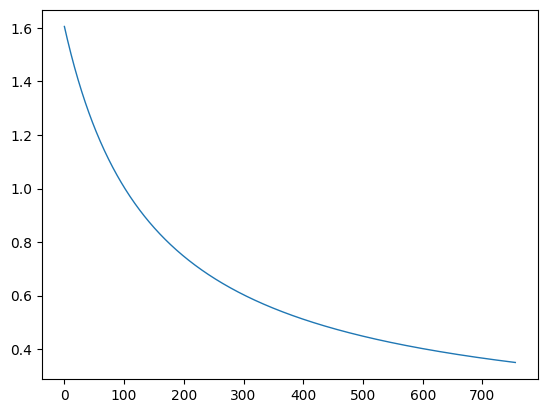

In [35]:
# Parameters 
t = 0
T = 3  # Total time in years
dt = 1/252  # Daily time step
n_steps = int(T / dt)



taus = np.arange(0, n_steps) * dt  # Time steps

prices = term_structure(taus)
#plt.plot(t, prices, lw=1, label='Term Structure')
#plt.plot(taus, vol_structure(taus, T, a, b, c), lw=1, label='Volatility Structure')
plt.plot(sigma_brs(t, t+dt, taus, a,b,c), lw=1, label='Volatility Structure')


## Simulation

### One factor

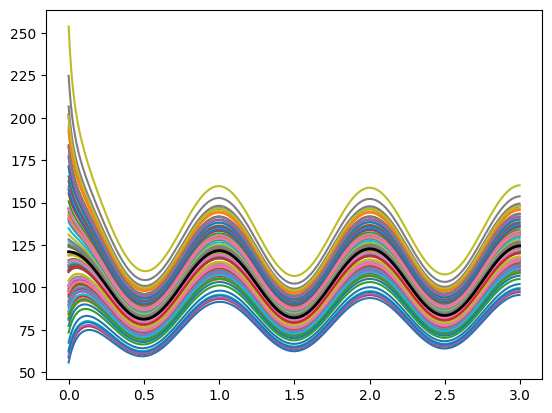

In [43]:
b = 2/3/10
a = 0.2*b
c = 0.1

# Parameters 
n_sims = 100  # Number of paths to simulate
T = 3  # Total time in years
dt = 1/252  # Daily time step
n_steps = int(T / dt)



taus = np.arange(0, n_steps) * dt  # Time steps
# Generate independent random samples
w = np.random.randn(n_sims, 1)

initial_term_structure = term_structure(taus)

#sigma = 0.3

sigma = sigma_brs(t, t+dt, taus, a,b,c) # Term structure of volatility
z = np.exp(sigma * w - 0.5 * sigma**2*dt) 

sim_curves = z *  initial_term_structure

# Plot each row as a separate line
for i, row in enumerate(sim_curves):
    plt.plot(taus,row, label=f'Row {i+1}')
    
plt.plot(taus, initial_term_structure, color='black', lw=2, label='Term Structure')
#plt.plot(taus,sigma_brs(t, t+dt, taus, a,b,c), color='black', lw=2, label='Term Structure')



## Check simulation consistency